In [ ]:
#### Library jupyter notebook ####
import os
import re
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from operator import itemgetter
from typing import Dict, Tuple, List, Set

In [ ]:
### Library nltk #####
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import dataclasses
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# from nltk.corpus import movie_reviews
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from random import shuffle


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# sklearn preprocessing process [feature Extraction=Feature vector] and model classification and evaluation report for classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [ ]:
# weight model or encoding 
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.corpora import Dictionary
import gensim.downloader as api
from gensim.models import Word2Vec as w2v

from keras_preprocessing.sequence import pad_sequences
## processing normalization from w2v with pad_sequences ##3

from gensim.models import KeyedVectors

In [ ]:
## tensorflow create layer in process of neural network
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
### preprocess step in Tokenizer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving email_edit2.csv to email_edit2.csv


In [ ]:
### Readfile CSV File
spam_dataset = pd.read_csv("email_edit2.csv")

In [ ]:
spam_dataset

text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
8106  Want explicit SEX in 30 secs? Ring 02073162414...     1
8107  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     1
8108  Had your contract mobile 11 Mnths? Latest Moto...     1
8109  REMINDER FROM O2: To get 2.50 pounds free call...     1
8110  This is the 2nd time we have tried 2 contact u...     1

[8111 rows x 2 columns]

Preprocessing and EDA(Exploratory data)

In [ ]:
#spam_dataset.isnull().sum()

In [ ]:
#duplicate = spam_dataset[spam_dataset.duplicated()]

In [ ]:
#spam_dataset.drop_duplicates(subset='text',inplace=True, keep='last')

In [ ]:
spam_dataset

text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
8106  Want explicit SEX in 30 secs? Ring 02073162414...     1
8107  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     1
8108  Had your contract mobile 11 Mnths? Latest Moto...     1
8109  REMINDER FROM O2: To get 2.50 pounds free call...     1
8110  This is the 2nd time we have tried 2 contact u...     1

[8111 rows x 2 columns]

In [ ]:
len(spam_dataset)

8111

In [ ]:
spam_dataset['spam'].value_counts()

0    4327
1    3784
Name: spam, dtype: int64

# Count Plot  ##

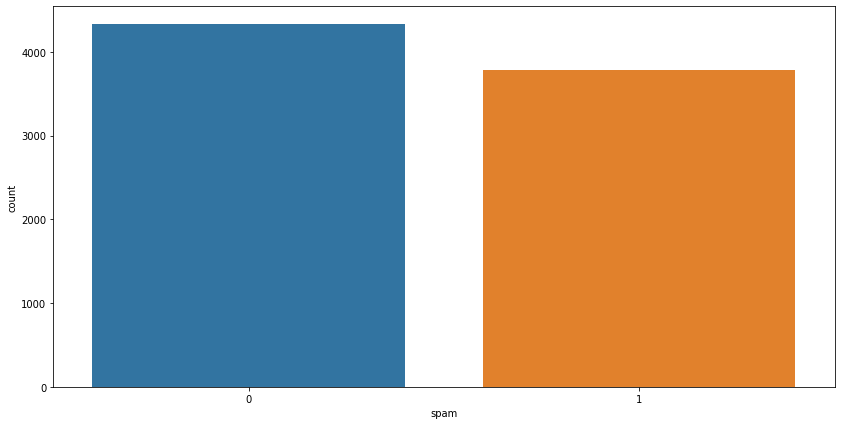

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=spam_dataset['spam'],data = spam_dataset)
plt.show()

In [ ]:
### กระบวนการแปลงข้อมูล text ภายใน
class TextProcessor :
    ### Lower casing อักษรตัวเลขทั้งหมดใน dataset [Outlier]
    def lowerCasing(self, total_dataset):
        return total_dataset.text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
#####################################################################################################################

### Punctuation Removal นำตัวอักษรพยัญชนะคั่่นตัวอักษรออก [ ':' , '.' , '?' , '()' , '[]' , ';' ] [outlier]
    def removePunctuation(self, text):
        for punctuation in string.punctuation:
            text = text.str.replace(punctuation, '')
        return text

####################################################################################################################

### Identifying and Removing Stop Words [a, an ,the , etc ] คำที่เจอบ่อยๆในเอกสารทำการกรองและเอาออก [outlier]
    def removeStopWords(self, data):
        stop_words = stopwords.words('english')
        sw_list = ['ur','u','1','2','3','4','5','6','7','8','9','0','im']
        stop_words.extend(sw_list)
        return data.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

####################################################################################################################    

### Tokenize Text in Words ### [split sentence into pieces]  [extract]
### Be Processing to change form sentence to input data
    def tokenizeTextWords(self, data):
        return data.apply(lambda x: word_tokenize(x))

    
####################################################################################################################    

### NLTK word stemming ### [change word "Suffix" into rootwords]    [cleaning]
    def wordStemming(self, tockenized_data):
        stemmer = PorterStemmer()
        return tockenized_data.apply(lambda x: [stemmer.stem(word) for word in x])
## stemmer expects tokenized data as input

        
####################################################################################################################    


### Lemmatizing words using WordNet [รูปแบบการแปรคำ ผันคำ เพื่อกำจัด Infection ของคำ Tense,soud,Tones into rootword] [cleaning]
    def wordNetLemmatizer(self, tockenized_data):  
        lemmatizer = WordNetLemmatizer()
        
        ## lemmatizer expects tokenized data as input
        ## Lemmatizer expects the part of speech with each word
        ## thus it will reduce down the words properly
        
        return tockenized_data.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
        ### Plotting Frequencies of Words ### [กระบวนหาค่าความถี่ของคำ] [visualization][EDA]
    def plotWordFrequency(self, lemmatized_data):    
            
        ## extract all words in List    
        word_review_list = lemmatized_data.tolist()
        all_words = [item for sublist in word_review_list for item in sublist]
            
        ## initialize the frequency counter ## [กระบวนการทำงานความการหาค่าความถี่ของคำที่มีในชุดข้อมูลมากที่สุดและทำการเรียงลำดับจากมากไปน้อย]
        word_counter = Counter(all_words)
            
        most_common_words = word_counter.most_common()[:10]
        most_common_words = pd.DataFrame(most_common_words)
        most_common_words.columns = ['word', 'freq']
        plt.figure(figsize=(14,7))
        most_common_words.sort_values(by='freq',ascending=True).plot(x='word', kind='barh')
        plt.show()
            

In [ ]:
## In order to do an appropriate analysis,punctuation is removed,case is lowered and preprocessing is done using Textprocessor class method 
## Creating object of text processor class to call its methods
textProcessorObject = TextProcessor()

# Change alphabet ให้เป็นรูปแบบเดียวกันทั้งหมด ###

In [ ]:
spam_dataset['lowercase_text'] = textProcessorObject.lowerCasing(spam_dataset)
spam_dataset.head()

text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                      lowercase_text  
0  subject: naturally irresistible your corporate...  
1  subject: the stock trading gunslinger fanny is...  
2  subject: unbelievable new homes made easy im w...  
3  subject: 4 color printing special request addi...  
4  subject: do not have money , get software cds ...

In [ ]:
spam_dataset['lowercase_text'][3000] 

'subject: feedback forms vince , here are the feedback forms for the following : vp and md manager and professional administrative support let me know if you have any other questions . norma x 31545'

# Removing Punctuation  ####

In [ ]:
### Removing punctuations ###
spam_dataset['remove_punctuation'] = textProcessorObject.removePunctuation(spam_dataset['lowercase_text'])
spam_dataset.head()

<ipython-input-16-1547043c6b3c>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  text = text.str.replace(punctuation, '')


text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                      lowercase_text  \
0  subject: naturally irresistible your corporate...   
1  subject: the stock trading gunslinger fanny is...   
2  subject: unbelievable new homes made easy im w...   
3  subject: 4 color printing special request addi...   
4  subject: do not have money , get software cds ...   

                                  remove_punctuation  
0  subject naturally irresistible your corporate ...  
1  subject the stock trading gunslinger fanny is ...  
2  subject unbelievable new homes made easy im wa...  
3  subject 4 color printing special request addit...  
4  subject do not have money  get software cds fr...

In [ ]:
spam_dataset['remove_punctuation'][8]

'subject undeliverable  home based business for grownups your message subject  home based business for grownups sent  sun  21 jan 2001 09  24  27  0100 did not reach the following recipient  s   75  tfi  kpn  com on mon  25 feb 2002 13  32  23  0100 the recipient name is not recognized the mts  id of the original message is  c  us  a   p  ptt telecom  l  mtpi 70590202251232 fjt 4 d 8 q 5 msexch  ims  kpn  telecom  i  mtpi 7059 0  000 co 5 a 6  unknown recipient'

# Removing Stop Words ####

In [ ]:
spam_dataset['stopwords_removal'] = textProcessorObject.removeStopWords(spam_dataset['remove_punctuation'])
spam_dataset.head()

text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                      lowercase_text  \
0  subject: naturally irresistible your corporate...   
1  subject: the stock trading gunslinger fanny is...   
2  subject: unbelievable new homes made easy im w...   
3  subject: 4 color printing special request addi...   
4  subject: do not have money , get software cds ...   

                                  remove_punctuation  \
0  subject naturally irresistible your corporate ...   
1  subject the stock trading gunslinger fanny is ...   
2  subject unbelievable new homes made easy im wa...   
3  subject 4 color printing special request addit...   
4  subject do not have money  get software cds fr...   

                                   stopwords_removal  
0  subject naturally irresistible corporate ident...  
1  subject stock trading gunslinger fanny merrill...  
2  subject unbelievable new homes made easy wanti...  
3  subject color printing special request additio...  
4  subject money get software cds software compat...

In [ ]:
spam_dataset['stopwords_removal'][8]

'subject undeliverable home based business grownups message subject home based business grownups sent sun 21 jan 2001 09 24 27 0100 reach following recipient 75 tfi kpn com mon 25 feb 2002 13 32 23 0100 recipient name recognized mts id original message c us p ptt telecom l mtpi 70590202251232 fjt q msexch ims kpn telecom mtpi 7059 000 co unknown recipient'

In [ ]:
## text cleaning ##

## Preprocessing function to remove tags, html, special character, and etc
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('',text)

def preprocess_text(inputSentence):
    
     #Remove html tags
    sentence = remove_tags(inputSentence)
    
    #Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    
    #Removing email address
    sentence = re.sub(r'[^\s]+@[^*()\s]+', ' ', sentence)
    
    #Removing http address
    sentence = re.sub(r'(http|https)://[^\s]*', ' ', sentence)
    
    #Removing dollar address
    sentence = re.sub(r'[$]+', ' ', sentence)
    
    #Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    #Removing subject
    sentence = re.sub(r'^(subject\s?)', ' ', sentence)
  
    #Removing number
    sentence = re.sub(r'^@[a-zA-z0-9]|^#[a-zA-Z0-9]|\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*|\W+|\d+|<("[^"]*"|\'[^\']*\'|[^\'">])*>|_+|[^\u0000-\u007f]+', ' ', sentence)
    return sentence

spam_dataset['processed_text'] = spam_dataset['stopwords_removal']
spam_dataset['processed_text'] = spam_dataset.processed_text.apply(lambda x : preprocess_text(x))

In [ ]:
spam_dataset['processed_text']

0        naturally irresistible corporate identity lt ...
1        stock trading gunslinger fanny merrill muzo c...
2        unbelievable new homes made easy wanting show...
3        color printing special request additional inf...
4        money get software cds software compatibility...
                              ...                        
8106    want explicit sex   secs ring   costs  pmin gs...
8107    asked  mobile   chatlines inclu free mins indi...
8108    contract mobile   mnths latest motorola nokia ...
8109    reminder o  get   pounds free call credit deta...
8110     nd time tried contact   pound prize claim eas...
Name: processed_text, Length: 8111, dtype: object

# Tokenize text in words ### [sentence to words]

In [ ]:
spam_dataset['tokens'] = textProcessorObject.tokenizeTextWords(spam_dataset['processed_text'])
spam_dataset.head()

text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                      lowercase_text  \
0  subject: naturally irresistible your corporate...   
1  subject: the stock trading gunslinger fanny is...   
2  subject: unbelievable new homes made easy im w...   
3  subject: 4 color printing special request addi...   
4  subject: do not have money , get software cds ...   

                                  remove_punctuation  \
0  subject naturally irresistible your corporate ...   
1  subject the stock trading gunslinger fanny is ...   
2  subject unbelievable new homes made easy im wa...   
3  subject 4 color printing special request addit...   
4  subject do not have money  get software cds fr...   

                                   stopwords_removal  \
0  subject naturally irresistible corporate ident...   
1  subject stock trading gunslinger fanny merrill...   
2  subject unbelievable new homes made easy wanti...   
3  subject color printing special request additio...   
4  subject money get software cds software compat...   

                                      processed_text  \
0   naturally irresistible corporate identity lt ...   
1   stock trading gunslinger fanny merrill muzo c...   
2   unbelievable new homes made easy wanting show...   
3   color printing special request additional inf...   
4   money get software cds software compatibility...   

                                              tokens  
0  [naturally, irresistible, corporate, identity,...  
1  [stock, trading, gunslinger, fanny, merrill, m...  
2  [unbelievable, new, homes, made, easy, wanting...  
3  [color, printing, special, request, additional...  
4  [money, get, software, cds, software, compatib...

## perform stemming ###[change word "Suffix" into rootwords]### 

In [ ]:
spam_dataset['stemmer'] = textProcessorObject.wordStemming(spam_dataset['tokens'])
spam_dataset.head()

text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                      lowercase_text  \
0  subject: naturally irresistible your corporate...   
1  subject: the stock trading gunslinger fanny is...   
2  subject: unbelievable new homes made easy im w...   
3  subject: 4 color printing special request addi...   
4  subject: do not have money , get software cds ...   

                                  remove_punctuation  \
0  subject naturally irresistible your corporate ...   
1  subject the stock trading gunslinger fanny is ...   
2  subject unbelievable new homes made easy im wa...   
3  subject 4 color printing special request addit...   
4  subject do not have money  get software cds fr...   

                                   stopwords_removal  \
0  subject naturally irresistible corporate ident...   
1  subject stock trading gunslinger fanny merrill...   
2  subject unbelievable new homes made easy wanti...   
3  subject color printing special request additio...   
4  subject money get software cds software compat...   

                                      processed_text  \
0   naturally irresistible corporate identity lt ...   
1   stock trading gunslinger fanny merrill muzo c...   
2   unbelievable new homes made easy wanting show...   
3   color printing special request additional inf...   
4   money get software cds software compatibility...   

                                              tokens  \
0  [naturally, irresistible, corporate, identity,...   
1  [stock, trading, gunslinger, fanny, merrill, m...   
2  [unbelievable, new, homes, made, easy, wanting...   
3  [color, printing, special, request, additional...   
4  [money, get, software, cds, software, compatib...   

                                             stemmer  
0  [natur, irresist, corpor, ident, lt, realli, h...  
1  [stock, trade, gunsling, fanni, merril, muzo, ...  
2  [unbeliev, new, home, made, easi, want, show, ...  
3  [color, print, special, request, addit, inform...  
4  [money, get, softwar, cd, softwar, compat, gre...

In [ ]:
spam_dataset['stemmer'][9]

['save',
 'money',
 'buy',
 'get',
 'thing',
 'tri',
 'ciall',
 'yet',
 'can',
 'not',
 'even',
 'imagin',
 'like',
 'real',
 'man',
 'bed',
 'thing',
 'great',
 'errrectlon',
 'provid',
 'exactiy',
 'want',
 'ciali',
 'lot',
 'advantag',
 'viagra',
 'effect',
 'last',
 'hour',
 'readi',
 'start',
 'within',
 'minut',
 'mix',
 'aicohoi',
 'ship',
 'countri',
 'get',
 'right']

## Create the dictionary ##

## EDA Exploration information form data ###

### plotting word frequency for top 10 words ###

<Figure size 1008x504 with 0 Axes>

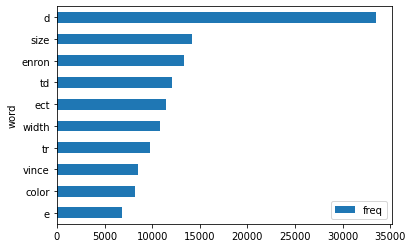

In [ ]:
textProcessorObject.plotWordFrequency(spam_dataset['tokens'])

In [ ]:
##Word count per rows
spam_dataset['WordCount'] = spam_dataset['stemmer'].str.len()
spam_dataset.reset_index()

index                                               text  spam  \
0         0  Subject: naturally irresistible your corporate...     1   
1         1  Subject: the stock trading gunslinger  fanny i...     1   
2         2  Subject: unbelievable new homes made easy  im ...     1   
3         3  Subject: 4 color printing special  request add...     1   
4         4  Subject: do not have money , get software cds ...     1   
...     ...                                                ...   ...   
8106   8106  Want explicit SEX in 30 secs? Ring 02073162414...     1   
8107   8107  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     1   
8108   8108  Had your contract mobile 11 Mnths? Latest Moto...     1   
8109   8109  REMINDER FROM O2: To get 2.50 pounds free call...     1   
8110   8110  This is the 2nd time we have tried 2 contact u...     1   

                                         lowercase_text  \
0     subject: naturally irresistible your corporate...   
1     subject: the stock trading gunslinger fanny is...   
2     subject: unbelievable new homes made easy im w...   
3     subject: 4 color printing special request addi...   
4     subject: do not have money , get software cds ...   
...                                                 ...   
8106  want explicit sex in 30 secs? ring 02073162414...   
8107  asked 3mobile if 0870 chatlines inclu in free ...   
8108  had your contract mobile 11 mnths? latest moto...   
8109  reminder from o2: to get 2.50 pounds free call...   
8110  this is the 2nd time we have tried 2 contact u...   

                                     remove_punctuation  \
0     subject naturally irresistible your corporate ...   
1     subject the stock trading gunslinger fanny is ...   
2     subject unbelievable new homes made easy im wa...   
3     subject 4 color printing special request addit...   
4     subject do not have money  get software cds fr...   
...                                                 ...   
8106  want explicit sex in 30 secs ring 02073162414 ...   
8107  asked 3mobile if 0870 chatlines inclu in free ...   
8108  had your contract mobile 11 mnths latest motor...   
8109  reminder from o2 to get 250 pounds free call c...   
8110  this is the 2nd time we have tried 2 contact u...   

                                      stopwords_removal  \
0     subject naturally irresistible corporate ident...   
1     subject stock trading gunslinger fanny merrill...   
2     subject unbelievable new homes made easy wanti...   
3     subject color printing special request additio...   
4     subject money get software cds software compat...   
...                                                 ...   
8106  want explicit sex 30 secs ring 02073162414 cos...   
8107  asked 3mobile 0870 chatlines inclu free mins i...   
8108  contract mobile 11 mnths latest motorola nokia...   
8109  reminder o2 get 250 pounds free call credit de...   
8110  2nd time tried contact £750 pound prize claim ...   

                                         processed_text  \
0      naturally irresistible corporate identity lt ...   
1      stock trading gunslinger fanny merrill muzo c...   
2      unbelievable new homes made easy wanting show...   
3      color printing special request additional inf...   
4      money get software cds software compatibility...   
...                                                 ...   
8106  want explicit sex   secs ring   costs  pmin gs...   
8107  asked  mobile   chatlines inclu free mins indi...   
8108  contract mobile   mnths latest motorola nokia ...   
8109  reminder o  get   pounds free call credit deta...   
8110   nd time tried contact   pound prize claim eas...   

                                                 tokens  \
0     [naturally, irresistible, corporate, identity,...   
1     [stock, trading, gunslinger, fanny, merrill, m...   
2     [unbelievable, new, homes, made, easy, wanting...   
3     [color, printing, special, request, additional...   
4     [mon

## Hisplot ##

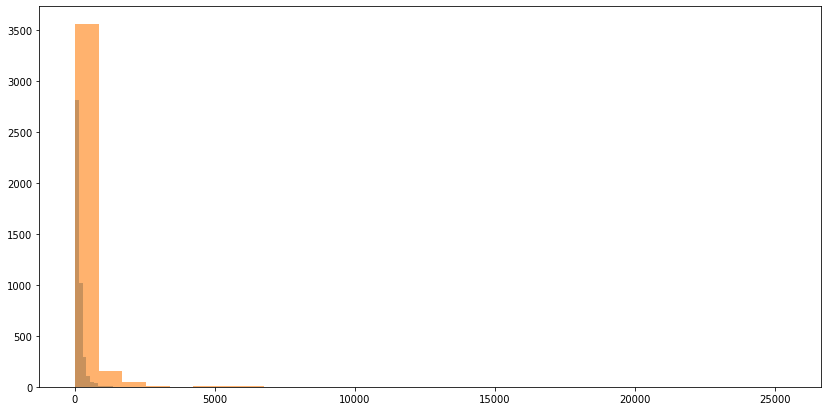

In [ ]:
plt.figure(figsize=(14,7))
plt.hist(spam_dataset[spam_dataset['spam']==0]['WordCount'], bins = 30 ,alpha = 0.6)
plt.hist(spam_dataset[spam_dataset['spam']==1]['WordCount'], bins = 30 ,alpha = 0.6)
plt.show()

- ขนาดของคำที่แยกได้ทั้งหมดอยู่ที่ 1000 กว่าคำ
- และขนาดข้อมูลทั้ง 2 มีความคล้ายกัน แตกต่างกันที่ปริมาณของกลุ่มคำที่เกิดขึ้นในแต่ละ target 
- กราฟยังไม่แน่นอน มีความเอนเอียงที่สูงในช่วงที่ 1-500 

## WordCloud ##

In [ ]:
text = ' '.join(spam_dataset[spam_dataset["spam"]==1]['processed_text'].tolist())

In [ ]:
wordcloud = WordCloud().generate(text)

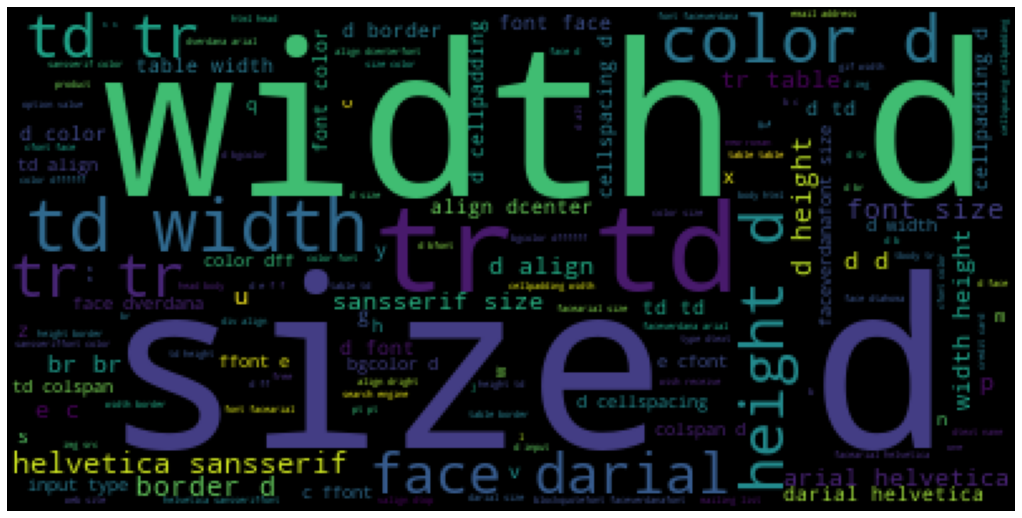

In [ ]:
plt.figure(figsize=(14,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
text = ' '.join(spam_dataset[spam_dataset["spam"]==0]['processed_text'].tolist())

In [ ]:
wordcloud = WordCloud().generate(text)

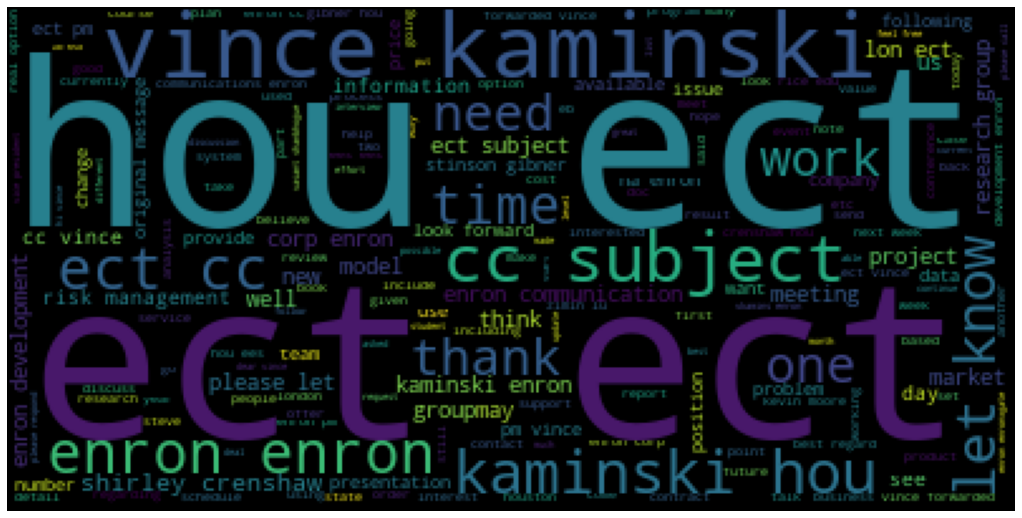

In [ ]:
plt.figure(figsize=(14,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
wordcloud = WordCloud().generate(text)

# Train Test Split For Machine Learning

In [ ]:
words = spam_dataset['text']
y = spam_dataset['spam']

# Bag of Words

### CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df=50,stop_words="english",max_df=0.8)
X = vectorizer.fit_transform(words)
vocabulary_size = len(vectorizer.get_feature_names())
print(vocabulary_size)

2737


### TF-IDF

In [ ]:
## bag of words creation 
##vectorizer = TfidfVectorizer()
##X = vectorizer.fit_transform(words)
##vocabulary_size = len(vectorizer.get_feature_names())
##print(vocabulary_size)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [ ]:
print('x_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('x_test.shape:',X_test.shape)
print('y_test.shape:',y_test.shape)

x_train.shape: (5677, 2737)
y_train.shape: (5677,)
x_test.shape: (2434, 2737)
y_test.shape: (2434,)


# Hyperparameter ##

In [ ]:
from sklearn import svm
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

num_folds = 5
k_fold = KFold(num_folds)
indices = range(len(words))

def hyperparameter_selection(model, hyperparameter_settings):
    
    best_hyperparam_setting = None
    best_cross_val_score = -np.inf   # assumes that a higher score is better
    for hyperparameter in hyperparameter_settings:
        fold_scores = []
        
        # your code to train and score the training data here
        for train_indices, val_indices in k_fold.split(indices):
            if model =='knn':
                classifier = KNeighborsClassifier(n_neighbors=hyperparameter)
            elif model =='svm':
                classifier = SVC(C=hyperparameter)
            elif model =='rf':
                num_trees, max_depth = hyperparameter
                classifier = RandomForestClassifier(n_estimators=num_trees,
                                                   max_depth=max_depth,
                                                   random_state=0)
            elif model =='log_li':
                solver_c, C_value, max_iter_value = hyperparameter
                classifier = LogisticRegression(solver = solver_c,
                                                max_iter = max_iter_value,
                                                C = C_value)
            elif model =='ada_boost':
                n_estimator_va,learning_rate_va = hyperparameter
                classifier = AdaBoostClassifier(n_estimators=n_estimator_va,
                                              learning_rate=learning_rate_va,
                                              random_state=0)
                
                
            classifier.fit(X[train_indices],
                           y[train_indices])
            predicted_val_labels = classifier.predict(X[val_indices])
            score = f1_score(y[val_indices], predicted_val_labels, average='weighted')
            fold_scores.append(score)

        cross_val_score = np.mean(fold_scores)
        print('hyperparameter = ', hyperparameter, ' ', cross_val_score)
        if cross_val_score > best_cross_val_score:  # assumes that a higher score is better
            best_cross_val_score = cross_val_score
            best_hyperparam_setting = hyperparameter
    print('Base hyperparameter setting:', best_hyperparam_setting)
    return best_hyperparam_setting

In [ ]:
hyperparam_settings_knn = [k for k in range(2, 20)]
best_k = hyperparameter_selection('knn', hyperparam_settings_knn)

hyperparameter =  2   0.8541213228612371
hyperparameter =  3   0.8483159934306614
hyperparameter =  4   0.8740181170578195
hyperparameter =  5   0.8775847804214869
hyperparameter =  6   0.874408081103088
hyperparameter =  7   0.8718838751714237
hyperparameter =  8   0.8698728013361665
hyperparameter =  9   0.8702462011002912
hyperparameter =  10   0.8642509467851376
hyperparameter =  11   0.8686277583268115
hyperparameter =  12   0.857444722363794
hyperparameter =  13   0.8652793489808932
hyperparameter =  14   0.8565428277206838
hyperparameter =  15   0.8586802330150203
hyperparameter =  16   0.8408391725797786
hyperparameter =  17   0.8466234210854626
hyperparameter =  18   0.82918836807481
hyperparameter =  19   0.8362853166131881
Base hyperparameter setting: 5


In [ ]:
## Random Forest
hyperparameter_settings_rf = [(num_trees, max_depth)
                              for num_trees in [50, 100, 150,250]
                              for max_depth in [3, 4, 5, 6, None]]
best_n_estimators, best_max_depth = hyperparameter_selection('rf', hyperparameter_settings_rf)

hyperparameter =  (50, 3)   0.6500958053959764
hyperparameter =  (50, 4)   0.6902780731762834
hyperparameter =  (50, 5)   0.7251814186744929
hyperparameter =  (50, 6)   0.7549483955980689
hyperparameter =  (50, None)   0.8814132000124196
hyperparameter =  (100, 3)   0.6426425922410062
hyperparameter =  (100, 4)   0.6838902840132312
hyperparameter =  (100, 5)   0.7170642680873293
hyperparameter =  (100, 6)   0.747835991886006
hyperparameter =  (100, None)   0.8768790986627627
hyperparameter =  (150, 3)   0.6288905370625569
hyperparameter =  (150, 4)   0.6809252124712306
hyperparameter =  (150, 5)   0.7171049312816988
hyperparameter =  (150, 6)   0.7482014071646754
hyperparameter =  (150, None)   0.8788443779413843
hyperparameter =  (250, 3)   0.6386075679248862
hyperparameter =  (250, 4)   0.6862202044285375
hyperparameter =  (250, 5)   0.7201054443424347
hyperparameter =  (250, 6)   0.7456171707264498
hyperparameter =  (250, None)   0.878215821942973
Base hyperparameter setting: (50, N

In [ ]:
# AdaBoost
hyperparameter_settings_ada = [(n_estimator_va, learning_rate_va)
                              for n_estimator_va in [1,20, 100, 150]
                              for learning_rate_va in [0.1, 1, 10]]
best_n_estimators, best_learning_rate = hyperparameter_selection('ada_boost', hyperparameter_settings_ada)

hyperparameter =  (1, 0.1)   0.6817891132949963
hyperparameter =  (1, 1)   0.6817891132949963
hyperparameter =  (1, 10)   0.6817891132949963
hyperparameter =  (20, 0.1)   0.7735091550585216
hyperparameter =  (20, 1)   0.8430119634184734
hyperparameter =  (20, 10)   0.8625463080319331
hyperparameter =  (100, 0.1)   0.8230732758578678
hyperparameter =  (100, 1)   0.8701601186118058
hyperparameter =  (100, 10)   0.8625463080319331
hyperparameter =  (150, 0.1)   0.8357575999133443
hyperparameter =  (150, 1)   0.8733613194498917
hyperparameter =  (150, 10)   0.8625463080319331
Base hyperparameter setting: (150, 1)


In [ ]:
## Logistic_linear
hyperparameter_settings_Log_li = [(solver , C, max_iter)
                                 for solver in ['newton-cg', 'lbfgs', 'liblinear']
                                 for C in [1, 10, 50, 100]
                                 for max_iter in [1, 10, 50, 100]]
best_log = hyperparameter_selection('log_li', hyperparameter_settings_Log_li)

hyperparameter =  ('newton-cg', 1, 1)   0.6669806680524786
hyperparameter =  ('newton-cg', 1, 10)   0.9015616628023727
hyperparameter =  ('newton-cg', 1, 50)   0.8916757062789908
hyperparameter =  ('newton-cg', 1, 100)   0.8916757062789908
hyperparameter =  ('newton-cg', 10, 1)   0.6669806680524786
hyperparameter =  ('newton-cg', 10, 10)   0.9020780321514472
hyperparameter =  ('newton-cg', 10, 50)   0.8893215573991725
hyperparameter =  ('newton-cg', 10, 100)   0.8893215573991725
hyperparameter =  ('newton-cg', 50, 1)   0.6669806680524786
hyperparameter =  ('newton-cg', 50, 10)   0.9020689802670183
hyperparameter =  ('newton-cg', 50, 50)   0.8886106854305288
hyperparameter =  ('newton-cg', 50, 100)   0.8886106854305288
hyperparameter =  ('newton-cg', 100, 1)   0.6669806680524786
hyperparameter =  ('newton-cg', 100, 10)   0.9023155362371458
hyperparameter =  ('newton-cg', 100, 50)   0.8884451488664752
hyperparameter =  ('newton-cg', 100, 100)   0.8884451488664752
hyperparameter =  ('lbfg

# Train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


# knn
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)
pred_knn = knn.predict(X_test)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, pred_knn)
auc_knn = np.trapz(tpr_knn, fpr_knn)
precision_knn, recall_knn, _knn = precision_recall_curve(y_test, pred_knn)
avg_precision_knn = np.mean(precision_knn)


In [ ]:
# AdaBoost
ada_boost = AdaBoostClassifier(n_estimators=best_n_estimators,
                         learning_rate=best_learning_rate,
                         random_state=0)
ada_boost.fit(X, y)
pre_ada_boost = ada_boost.predict(X_test)
fpr_ada_boost, tpr_ada_boost, thresholds_ada_boost = metrics.roc_curve(y_test, pre_ada_boost)
auc_ada_boost = np.trapz(tpr_ada_boost, fpr_ada_boost)
precision_ada_boost, recall_ada_boost, _ada_boost = precision_recall_curve(y_test, pre_ada_boost)
avg_precision_ada_boost = np.mean(precision_ada_boost)

In [ ]:
# log_li
log_li = LogisticRegression(solver ='lbfgs', max_iter=50,C= 100)
log_li.fit(X, y)
pred_log_li = log_li.predict(X_test)
fpr_log_li, tpr_log_li, thresholds_log_li = metrics.roc_curve(y_test, pred_log_li)
auc_log_li = np.trapz(tpr_log_li, fpr_log_li)
precision_log_li, recall_log_li, _log_li = precision_recall_curve(y_test, pred_log_li)
avg_precision_log_li = np.mean(precision_log_li)    

In [ ]:
# RF
rf = RandomForestClassifier(n_estimators=best_n_estimators, 
                            max_depth=best_max_depth,
                            random_state=0)
rf.fit(X,y)
pred_rf = rf.predict(X_test)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, pred_rf)
auc_rf = np.trapz(tpr_rf, fpr_rf)
precision_rf, recall_rf, _rf = precision_recall_curve(y_test, pred_rf)
avg_precision_rf = np.mean(precision_rf)

In [ ]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.95
Accuracy of KNN classifier on test set: 0.95


In [ ]:
print('Accuracy of RandomForest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of RandomForest classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 1.00


In [ ]:
print('Accuracy of RandomForest classifier on training set: {:.2f}'.format(ada_boost.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(ada_boost.score(X_test, y_test)))

Accuracy of RandomForest classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 1.00


In [ ]:
print('Accuracy of RandomForest classifier on training set: {:.2f}'.format(log_li.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(log_li.score(X_test, y_test)))

Accuracy of RandomForest classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 1.00


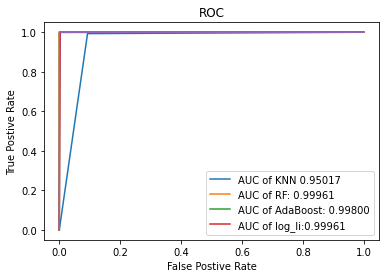

In [ ]:
# plot for ROC
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_ada_boost, tpr_ada_boost)
plt.plot(fpr_log_li, tpr_log_li)

ROC_labels = ['AUC of KNN {0:0.5f}'.format(auc_knn),
              'AUC of RF: {0:0.5f}'.format(auc_rf), 'AUC of AdaBoost: {0:0.5f}'.format(auc_ada_boost), 
              'AUC of log_li:{0:0.5f}'.format(auc_log_li)]
plt.legend(labels=ROC_labels)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('ROC')
plt.show()

# LSTM with pretrained Word2Vec Word Embedding

In [ ]:
X =[d.split() for d in spam_dataset['processed_text']]
X

[['naturally',
  'irresistible',
  'corporate',
  'identity',
  'lt',
  'really',
  'hard',
  'recollect',
  'company',
  'market',
  'full',
  'suqgestions',
  'information',
  'isoverwhelminq',
  'good',
  'catchy',
  'logo',
  'stylish',
  'statlonery',
  'outstanding',
  'website',
  'make',
  'task',
  'much',
  'easier',
  'promise',
  'havinq',
  'ordered',
  'iogo',
  'company',
  'automaticaily',
  'become',
  'world',
  'ieader',
  'isguite',
  'ciear',
  'without',
  'good',
  'products',
  'effective',
  'business',
  'organization',
  'practicable',
  'aim',
  'hotat',
  'nowadays',
  'market',
  'promise',
  'marketing',
  'efforts',
  'become',
  'much',
  'effective',
  'list',
  'clear',
  'benefits',
  'creativeness',
  'hand',
  'made',
  'original',
  'logos',
  'specially',
  'done',
  'reflect',
  'distinctive',
  'company',
  'image',
  'convenience',
  'logo',
  'stationery',
  'provided',
  'formats',
  'easy',
  'use',
  'content',
  'management',
  'system',


### Word2Vec

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM,window=5,min_count=1,sg=0)

In [ ]:
# vocabulary length = number of unique vector in space
len(w2v_model.wv.vocab)

159743

In [ ]:
w2v_model.wv['enron']

array([ 0.22752671,  0.5982495 ,  0.27026626, -0.44015235,  0.6059815 ,
        0.5540686 , -4.2980037 , -1.0511364 ,  1.8767378 ,  1.4477745 ,
       -0.66896504,  0.57800734,  2.6772516 ,  3.2507262 ,  1.7778763 ,
        0.55624723,  2.3544338 , -1.1925629 ,  1.133906  , -1.1039732 ,
        1.727285  ,  3.163734  ,  6.5706697 ,  0.5515652 ,  4.795782  ,
        2.4731505 , -1.5556753 , -0.5795006 ,  1.2074747 ,  2.0822837 ,
        0.06877029,  4.9744287 ,  1.9854835 ,  1.110572  , -1.4485879 ,
       -1.3493047 , -0.8507864 , -4.52278   ,  0.7239253 , -2.9487479 ,
        1.5441525 , -2.5633407 , -1.3170757 , -1.4977015 , -1.5021281 ,
       -0.1131723 ,  0.9731523 ,  0.5369507 , -2.6400235 , -2.5449984 ,
       -0.26165706, -1.3436404 ,  0.9912502 , -1.1113997 ,  1.5371324 ,
       -0.22693172,  0.7545531 ,  0.398473  , -2.0788457 , -1.1342309 ,
        0.84438956,  2.8570206 ,  1.8945675 ,  1.795819  , -1.3572123 ,
        0.0791817 , -1.9311206 , -3.0016773 , -2.43543   , -0.52

In [ ]:
w2v_model.wv.most_similar('welcome')

[('resumes', 0.9195462465286255),
 ('siddhi', 0.9156759977340698),
 ('requestp', 0.9142536520957947),
 ('wwwschoolofgeomaticscom', 0.9059901237487793),
 ('emanages', 0.8958331346511841),
 ('brennan', 0.8958091735839844),
 ('titlenews', 0.8956739902496338),
 ('caida', 0.8941867351531982),
 ('searched', 0.8938913941383362),
 ('rsnwdirl', 0.8926090002059937)]

In [ ]:
## feed these word vectors as initail weights to machine Learning models
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)
X

[[4977,
  20029,
  593,
  1795,
  2816,
  389,
  766,
  6333,
  55,
  82,
  291,
  9191,
  32,
  14119,
  131,
  6187,
  891,
  7799,
  8796,
  1701,
  212,
  51,
  2364,
  141,
  1547,
  1854,
  12034,
  1300,
  6188,
  55,
  17459,
  515,
  277,
  8434,
  9578,
  12035,
  294,
  131,
  239,
  740,
  34,
  1003,
  6492,
  3691,
  6672,
  5715,
  82,
  1854,
  213,
  926,
  515,
  141,
  740,
  50,
  1059,
  1062,
  6493,
  1043,
  194,
  261,
  3220,
  3597,
  537,
  2479,
  5869,
  55,
  1167,
  1234,
  891,
  1845,
  666,
  3355,
  356,
  84,
  251,
  101,
  184,
  6673,
  309,
  212,
  251,
  243,
  1242,
  6494,
  79,
  891,
  6018,
  156,
  414,
  34,
  180,
  6495,
  213,
  1590,
  51,
  5313,
  1607,
  1997,
  526,
  198,
  1388,
  620,
  490,
  1063,
  1401,
  6674,
  992,
  836,
  3221,
  132,
  837,
  191],
 [464,
  181,
  53727,
  53728,
  7074,
  53729,
  30764,
  53730,
  53731,
  44,
  53732,
  53733,
  53734,
  53735,
  49,
  413,
  53736,
  6675,
  30765,
  551,
  5373

In [ ]:
tokenizer.word_index

{'d': 1,
 'size': 2,
 'enron': 3,
 'td': 4,
 'ect': 5,
 'width': 6,
 'tr': 7,
 'vince': 8,
 'color': 9,
 'e': 10,
 'please': 11,
 'c': 12,
 'font': 13,
 'a': 14,
 'hou': 15,
 'com': 16,
 'email': 17,
 'b': 18,
 'height': 19,
 'br': 20,
 'face': 21,
 'would': 22,
 'subject': 23,
 'kaminski': 24,
 'align': 25,
 'table': 26,
 'cc': 27,
 'border': 28,
 'new': 29,
 'time': 30,
 'get': 31,
 'information': 32,
 'us': 33,
 'business': 34,
 'one': 35,
 'free': 36,
 'pm': 37,
 'name': 38,
 'may': 39,
 'helvetica': 40,
 'know': 41,
 'f': 42,
 'l': 43,
 'like': 44,
 'research': 45,
 'message': 46,
 'thanks': 47,
 'also': 48,
 'group': 49,
 'list': 50,
 'make': 51,
 'need': 52,
 'risk': 53,
 'mail': 54,
 'company': 55,
 'sansserif': 56,
 'energy': 57,
 'call': 58,
 'option': 59,
 'money': 60,
 'bgcolor': 61,
 'send': 62,
 'darial': 63,
 'html': 64,
 'href': 65,
 'power': 66,
 'let': 67,
 'work': 68,
 'people': 69,
 'div': 70,
 'click': 71,
 'arial': 72,
 'cellspacing': 73,
 'http': 74,
 'cellpaddin

(array([7.853e+03, 1.820e+02, 4.700e+01, 7.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([1.00000000e+00, 8.46566667e+02, 1.69213333e+03, 2.53770000e+03,
        3.38326667e+03, 4.22883333e+03, 5.07440000e+03, 5.91996667e+03,
        6.76553333e+03, 7.61110000e+03, 8.45666667e+03, 9.30223333e+03,
        1.01478000e+04, 1.09933667e+04, 1.18389333e+04, 1.26845000e+04,
        1.35300667e+04, 1.43756333e+04, 1.52212000e+04, 1.60667667e+04,
        1.69123333e+04, 1.77579000e+04, 1.86034667e+04, 1.94490333e+04,
        2.02946000e+04, 2.11401667e+04, 2.19857333e+04, 2.28313000e+04,
        2.36768667e+04, 2.45224333e+04, 2.53680000e+04]),
 <a list of 30 Patch objects>)

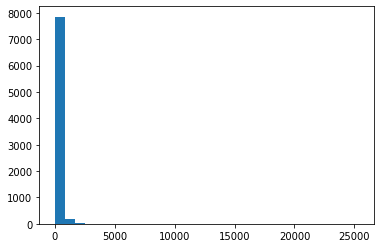

In [ ]:
plt.hist([len(X) for X in X], bins =30)

In [ ]:
array = np.array([len(X) for X in X])
len(array[array>3000])

22

In [ ]:
X = pad_sequences(X, maxlen=100)
X.shape

(8111, 100)

In [ ]:
VOCAB_LEN = len(tokenizer.word_index)+1
vocab = tokenizer.word_index

In [ ]:
print(VOCAB_LEN)

159744


In [ ]:
embedding_vectors = np.zeros((VOCAB_LEN, 100))

for word, i in vocab.items():
    embedding_vectors[i] = w2v_model.wv[word]

In [ ]:
embedding_vectors.shape

(159744, 100)

### Model_LSTM

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
model_LSTM = Sequential()
## add Embedding_layers
model_LSTM.add(Embedding(input_dim = VOCAB_LEN, output_dim = DIM, weights= [embedding_vectors], input_length= 100, trainable=False))
## add a LSTM Layer 
model_LSTM.add(LSTM(128))
## add a Dense layer with 1 unit
model_LSTM.add(Dense(1, activation='sigmoid'))
## compile the model
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
### train Test split
X_train, X_test, y_train, y_test = train_test_split(X, spam_dataset['spam'])

In [ ]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          15974400  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,091,777
Trainable params: 117,377
Non-trainable params: 15,974,400
_________________________________________________________________


In [ ]:
model_LSTM_plt = model_LSTM.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=1, batch_size = 128)

Epoch 1/10
34/34 [==============================] - 12s 278ms/step - loss: 0.3542 - acc: 0.8307 - val_loss: 0.1896 - val_acc: 0.9326
Epoch 2/10
34/34 [==============================] - 9s 271ms/step - loss: 0.1673 - acc: 0.9385 - val_loss: 0.1453 - val_acc: 0.9452
Epoch 3/10
34/34 [==============================] - 8s 246ms/step - loss: 0.1417 - acc: 0.9453 - val_loss: 0.1311 - val_acc: 0.9529
Epoch 4/10
34/34 [==============================] - 9s 253ms/step - loss: 0.1091 - acc: 0.9617 - val_loss: 0.1198 - val_acc: 0.9573
Epoch 5/10
34/34 [==============================] - 8s 249ms/step - loss: 0.1117 - acc: 0.9591 - val_loss: 0.1183 - val_acc: 0.9540
Epoch 6/10
34/34 [==============================] - 10s 298ms/step - loss: 0.0784 - acc: 0.9711 - val_loss: 0.0987 - val_acc: 0.9638
Epoch 7/10
34/34 [==============================] - 8s 246ms/step - loss: 0.0792 - acc: 0.9709 - val_loss: 0.0996 - val_acc: 0.9627
Epoch 8/10
34/34 [==============================] - 8s 247ms/step - loss: 

### Converting probability score to 0 and 1 labels for y pred

In [ ]:
y_pred = (model_LSTM.predict(X_test) >= 0.5).astype(int)

64/64 [==============================] - 3s 38ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9758382642998028

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1085
           1       0.98      0.97      0.97       943

    accuracy                           0.98      2028
   macro avg       0.98      0.98      0.98      2028
weighted avg       0.98      0.98      0.98      2028



In [ ]:
def show_performance_plot(mdl):
    #show the model accuracy
    plt.plot(mdl.history['acc'])
    plt.plot(mdl.history['val_acc'])
    
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()
    
    #show model loss
    plt.plot(mdl.history['loss'])
    plt.plot(mdl.history['val_loss'])
    
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

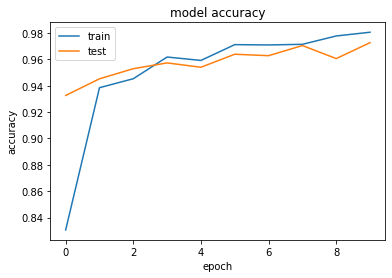

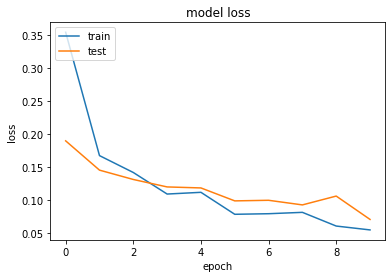

In [ ]:
show_performance_plot(model_LSTM_plt)

# Bi-directional LSTM

In [ ]:
## Model bidirectional LSTM
model_bi_lstm = Sequential()
## input cell_LSTM
model_bi_lstm.add(Embedding(input_dim = VOCAB_LEN, output_dim = DIM, weights=[embedding_vectors], input_length = 100, trainable=False))

# Dense cell hidden
model_bi_lstm.add(Bidirectional((LSTM(units = 128))))
model_bi_lstm.add(Dropout(0.5))

## Dense cell output
model_bi_lstm.add(Dense(1, activation='sigmoid'))

## compile
model_bi_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, spam_dataset['spam'])

In [ ]:
model_bi_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          15974400  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,209,153
Trainable params: 234,753
Non-trainable params: 15,974,400
_________________________________________________________________


In [ ]:
model_bi_lstm_plt = model_bi_lstm.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=1, batch_size=128)

Epoch 1/10
34/34 [==============================] - 18s 512ms/step - loss: 0.0948 - acc: 0.9648 - val_loss: 0.0859 - val_acc: 0.9677
Epoch 2/10
34/34 [==============================] - 16s 470ms/step - loss: 0.0736 - acc: 0.9699 - val_loss: 0.0872 - val_acc: 0.9699
Epoch 3/10
34/34 [==============================] - 16s 472ms/step - loss: 0.0572 - acc: 0.9784 - val_loss: 0.0655 - val_acc: 0.9775
Epoch 4/10
34/34 [==============================] - 16s 467ms/step - loss: 0.0597 - acc: 0.9765 - val_loss: 0.0764 - val_acc: 0.9710
Epoch 5/10
34/34 [==============================] - 16s 469ms/step - loss: 0.0491 - acc: 0.9829 - val_loss: 0.0656 - val_acc: 0.9753
Epoch 6/10
34/34 [==============================] - 16s 472ms/step - loss: 0.0371 - acc: 0.9864 - val_loss: 0.0773 - val_acc: 0.9737
Epoch 7/10
34/34 [==============================] - 16s 476ms/step - loss: 0.0486 - acc: 0.9810 - val_loss: 0.1239 - val_acc: 0.9573
Epoch 8/10
34/34 [==============================] - 18s 516ms/step - 

In [ ]:
y_pred = (model_bi_lstm.predict(X_test) >= 0.05).astype(int)

64/64 [==============================] - 4s 66ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9566074950690335

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1106
           1       0.91      1.00      0.95       922

    accuracy                           0.96      2028
   macro avg       0.96      0.96      0.96      2028
weighted avg       0.96      0.96      0.96      2028



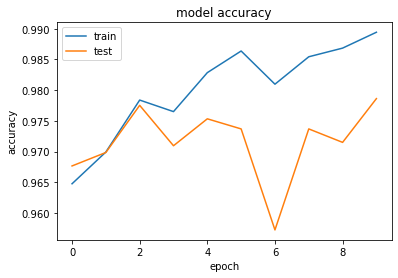

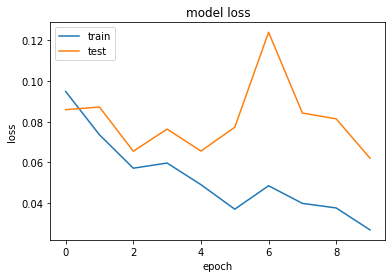

In [ ]:
show_performance_plot(model_bi_lstm_plt)